In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
from sklearn.datasets import load_wine
wine_dataset = load_wine() #wine_dataset

In [5]:
wd = pd.DataFrame(wine_dataset.data, columns=wine_dataset.feature_names)

In [6]:
wd.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


Предметная область: виноделие

Источник данных: https://scikit-learn.org/stable/datasets/toy_dataset.html

Характер данных: реальные.

Эти данные являются результатами химического анализа вин, выращенных в одном и том же регионе Италии тремя разными культиваторами. Было проведено тринадцать различных измерений, проведенных для различных компонентов, содержащихся в трех типах вина.

Атрибуты: 13 числовых атрибутов

Пропущенные данные: отсутствуют

1. Alcohol - алкоголь
2. Malic acid - яблочная кислота
3. Ash - пепел
4. Alcalinity of ash - щелочность золы
5. Magnesium - магний
6. Total phenols - всего фенолов
7. Flavanoids - флаваноиды
8. Nonflavanoid phenols - нефлаваноидные фенолы
9. Proanthocyanins - проантоцианы
10. Color intensity - интенсивность цвета
11. Hue - оттенок
12. OD280/OD315 of diluted wines - OD280 / OD315 разбавленных вин
13. Proline - пролин

Расчёт среднего значения и стандартного отклонения (mean и std)

In [7]:
wd_vals = pd.concat([wd.mean(), wd.std()], axis = 1)
wd_vals.columns = ['mean', 'std']
wd_vals

,mean,std
alcohol,13.000618,0.811827
malic_acid,2.336348,1.117146
ash,2.366517,0.274344
alcalinity_of_ash,19.494944,3.339564
magnesium,99.741573,14.282484
total_phenols,2.295112,0.625851
flavanoids,2.029270,0.998859
nonflavanoid_phenols,0.361854,0.124453
proanthocyanins,1.590899,0.572359
color_intensity,5.058090,2.318286


Построение гистограмм

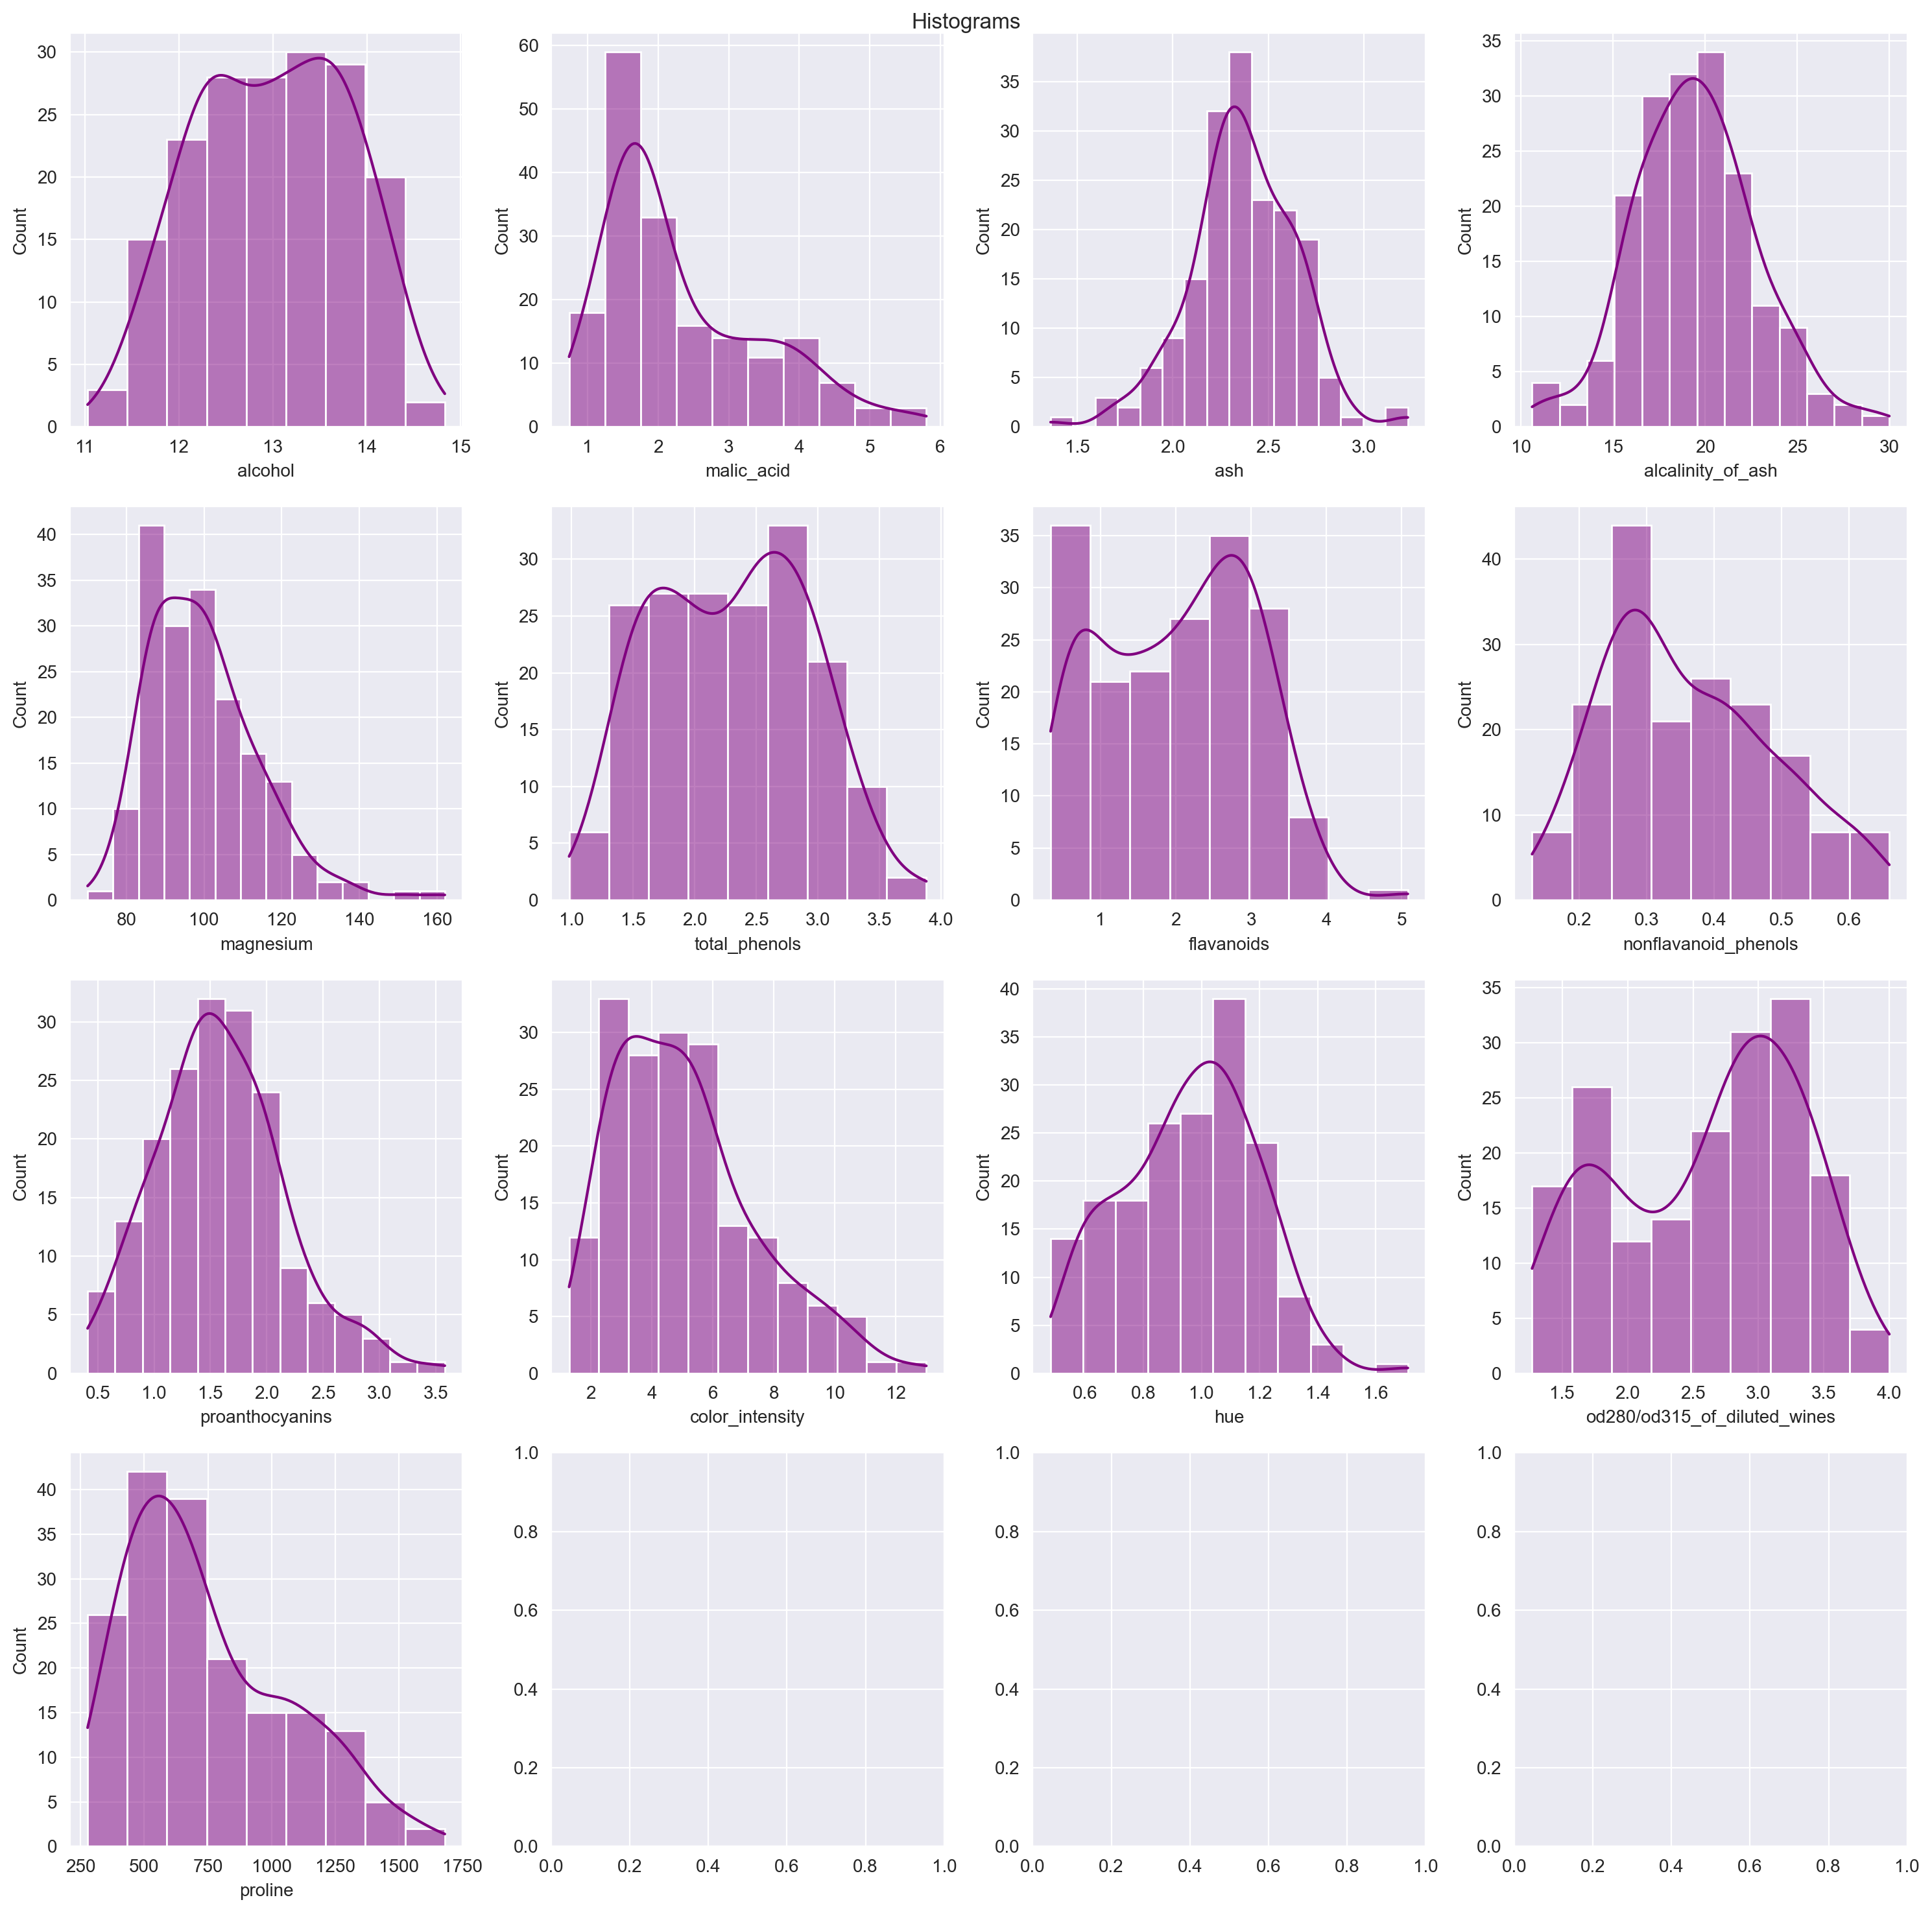

In [16]:
sns.set_style('darkgrid')
sns.set_palette('pastel')
fig, axes = plt.subplots(4, 4, figsize = (15, 15), dpi = 200)
fig.suptitle('Histograms')

for i, column in enumerate(wd.columns):
    sns.histplot(wd[column], ax=axes[i//4, i%4], kde = True, color = 'purple')

plt.tight_layout()
plt.show()


Для определения выбросов воспользуемся методом IQR

Дополнительно построим boxplot для наглядности

In [9]:
outliers = []
for col in wd.columns:    
    q1=wd[col].quantile(0.25)
    q3=wd[col].quantile(0.75)    
    IQR=q3-q1
    outliers = wd[col][((wd[col]<(q1-1.5*IQR)) | (wd[col]>(q3+1.5*IQR)))]    
    print(f'number of outliers in {col} : {str(len(outliers))}', )   
    if (len(outliers)) != 0:
        print("value:")        
        print(outliers)
    print('-'*50)

number of outliers in alcohol : 0
--------------------------------------------------
number of outliers in malic_acid : 3
value:
123    5.80
137    5.51
173    5.65
Name: malic_acid, dtype: float64
--------------------------------------------------
number of outliers in ash : 3
value:
25     3.22
59     1.36
121    3.23
Name: ash, dtype: float64
--------------------------------------------------
number of outliers in alcalinity_of_ash : 4
value:
59     10.6
73     30.0
121    28.5
127    28.5
Name: alcalinity_of_ash, dtype: float64
--------------------------------------------------
number of outliers in magnesium : 4
value:
69    151.0
73    139.0
78    136.0
95    162.0
Name: magnesium, dtype: float64
--------------------------------------------------
number of outliers in total_phenols : 0
--------------------------------------------------
number of outliers in flavanoids : 0
--------------------------------------------------
number of outliers in nonflavanoid_phenols : 0
-----------

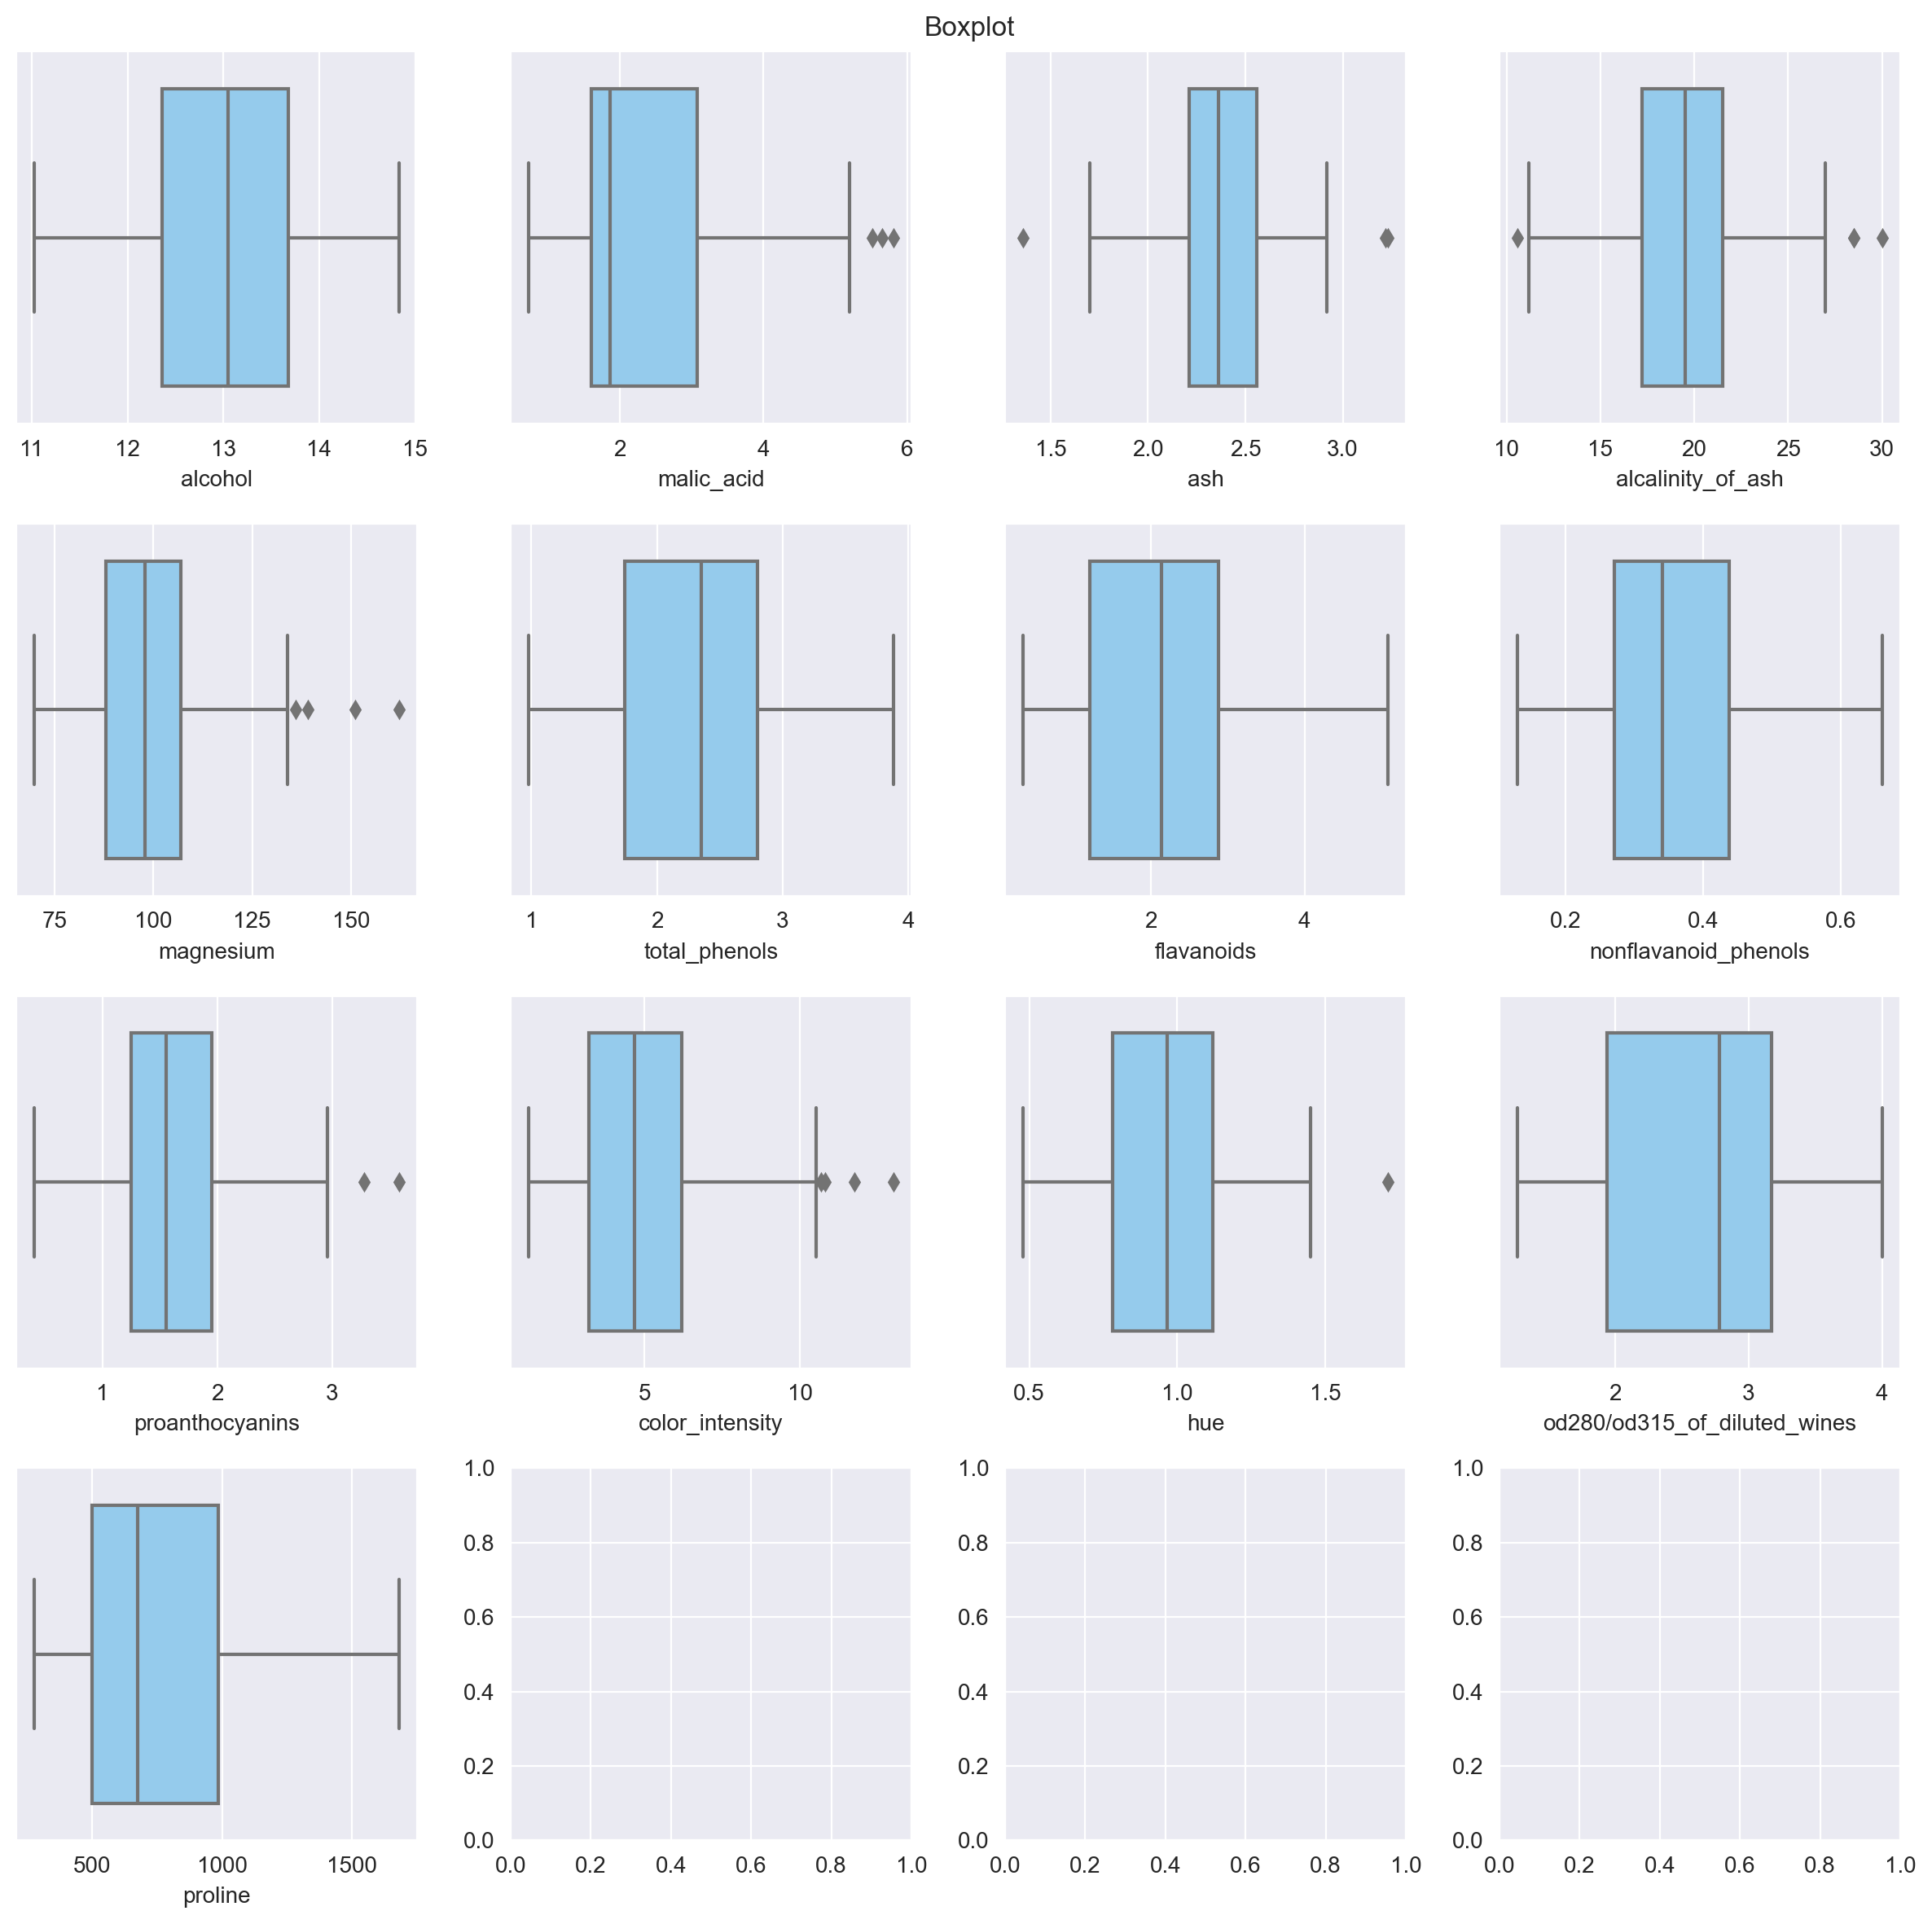

In [10]:
sns.set_style('darkgrid')
sns.set_palette('pastel')

fig, axes = plt.subplots(4, 4, figsize = (12, 12), dpi = 200)
fig.suptitle('Boxplot')
for i, column in enumerate(wd.columns):
    sns.boxplot(x = wd[column], ax=axes[i//4, i%4], color = 'lightskyblue')
    
plt.tight_layout()
plt.show()

Выявление пропущенных значений

In [20]:
wd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

Non-Null Count для каждого атрибута одинаков и равен 178, из чего можем сделать вывод, что пропущенных данных нет

Определение корреляции 

Будем считать высокой корреляцию между параметрами, если по модулю она превышает 0.5

In [12]:
correlation_matrix = wd.corr()

correlation_mask_high = (correlation_matrix.abs() > 0.5) & (correlation_matrix != 1.0)

pairs = []

for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if correlation_mask_high.loc[col1, col2] and (correlation_matrix.loc[col1, col2] > 0) and ((col1, col2) not in pairs) and ((col2, col1) not in pairs):
            pairs.append((col1, col2))
            print(f"Высокая положительная корреляция между {col1} и {col2}: {correlation_matrix.loc[col1, col2]}")
        elif correlation_mask_high.loc[col1, col2] and (correlation_matrix.loc[col1, col2] < 0) and ((col1, col2) not in pairs) and ((col2, col1) not in pairs):
            pairs.append((col1, col2))
            print(f"Высокая отрицательная корреляция между {col1} и {col2}: {correlation_matrix.loc[col1, col2]}")


Высокая положительная корреляция между alcohol и color_intensity: 0.546364195083705
Высокая положительная корреляция между alcohol и proline: 0.6437200371782134
Высокая отрицательная корреляция между malic_acid и hue: -0.5612956886649447
Высокая положительная корреляция между total_phenols и flavanoids: 0.8645635000951147
Высокая положительная корреляция между total_phenols и proanthocyanins: 0.6124130837800363
Высокая положительная корреляция между total_phenols и od280/od315_of_diluted_wines: 0.6999493647911861
Высокая отрицательная корреляция между flavanoids и nonflavanoid_phenols: -0.5378996119051984
Высокая положительная корреляция между flavanoids и proanthocyanins: 0.6526917686075153
Высокая положительная корреляция между flavanoids и hue: 0.5434785664899897
Высокая положительная корреляция между flavanoids и od280/od315_of_diluted_wines: 0.787193901866951
Высокая отрицательная корреляция между nonflavanoid_phenols и od280/od315_of_diluted_wines: -0.5032695960789114
Высокая пол

Отсутствием корреляции будем считать корреляцию, меньшую чем 0.1.

In [21]:
correlation_mask_low = (correlation_matrix.abs() < 0.1)
pairs_low = []

for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if correlation_mask_low.loc[col1, col2]  and ((col1, col2) not in pairs_low) and ((col2, col1) not in pairs_low):
            pairs_low.append((col1, col2))
            print(f"Корреляция отсутствует между {col1} и {col2}: {correlation_matrix.loc[col1, col2]}")

Корреляция отсутствует между alcohol и malic_acid: 0.09439694091041516
Корреляция отсутствует между alcohol и hue: -0.0717471973301557
Корреляция отсутствует между alcohol и od280/od315_of_diluted_wines: 0.07234318740052098
Корреляция отсутствует между malic_acid и magnesium: -0.05457509608400031
Корреляция отсутствует между ash и proanthocyanins: 0.009651935152086568
Корреляция отсутствует между ash и hue: -0.07466688903277331
Корреляция отсутствует между ash и od280/od315_of_diluted_wines: 0.0039112306302746085
Корреляция отсутствует между alcalinity_of_ash и magnesium: -0.08333308856795228
Корреляция отсутствует между alcalinity_of_ash и color_intensity: 0.018731980931229433
Корреляция отсутствует между magnesium и hue: 0.05539819560300633
Корреляция отсутствует между magnesium и od280/od315_of_diluted_wines: 0.06600393603204628
Корреляция отсутствует между total_phenols и color_intensity: -0.05513641774236631
Корреляция отсутствует между proanthocyanins и color_intensity: -0.025249

Построение матрицы рассеивания

              Attribute1                    Attribute2
0                alcohol               color_intensity
1                alcohol                       proline
2             malic_acid                           hue
3          total_phenols                    flavanoids
4          total_phenols               proanthocyanins
5          total_phenols  od280/od315_of_diluted_wines
6             flavanoids          nonflavanoid_phenols
7             flavanoids               proanthocyanins
8             flavanoids                           hue
9             flavanoids  od280/od315_of_diluted_wines
10  nonflavanoid_phenols  od280/od315_of_diluted_wines
11       proanthocyanins  od280/od315_of_diluted_wines
12       color_intensity                           hue
13                   hue  od280/od315_of_diluted_wines


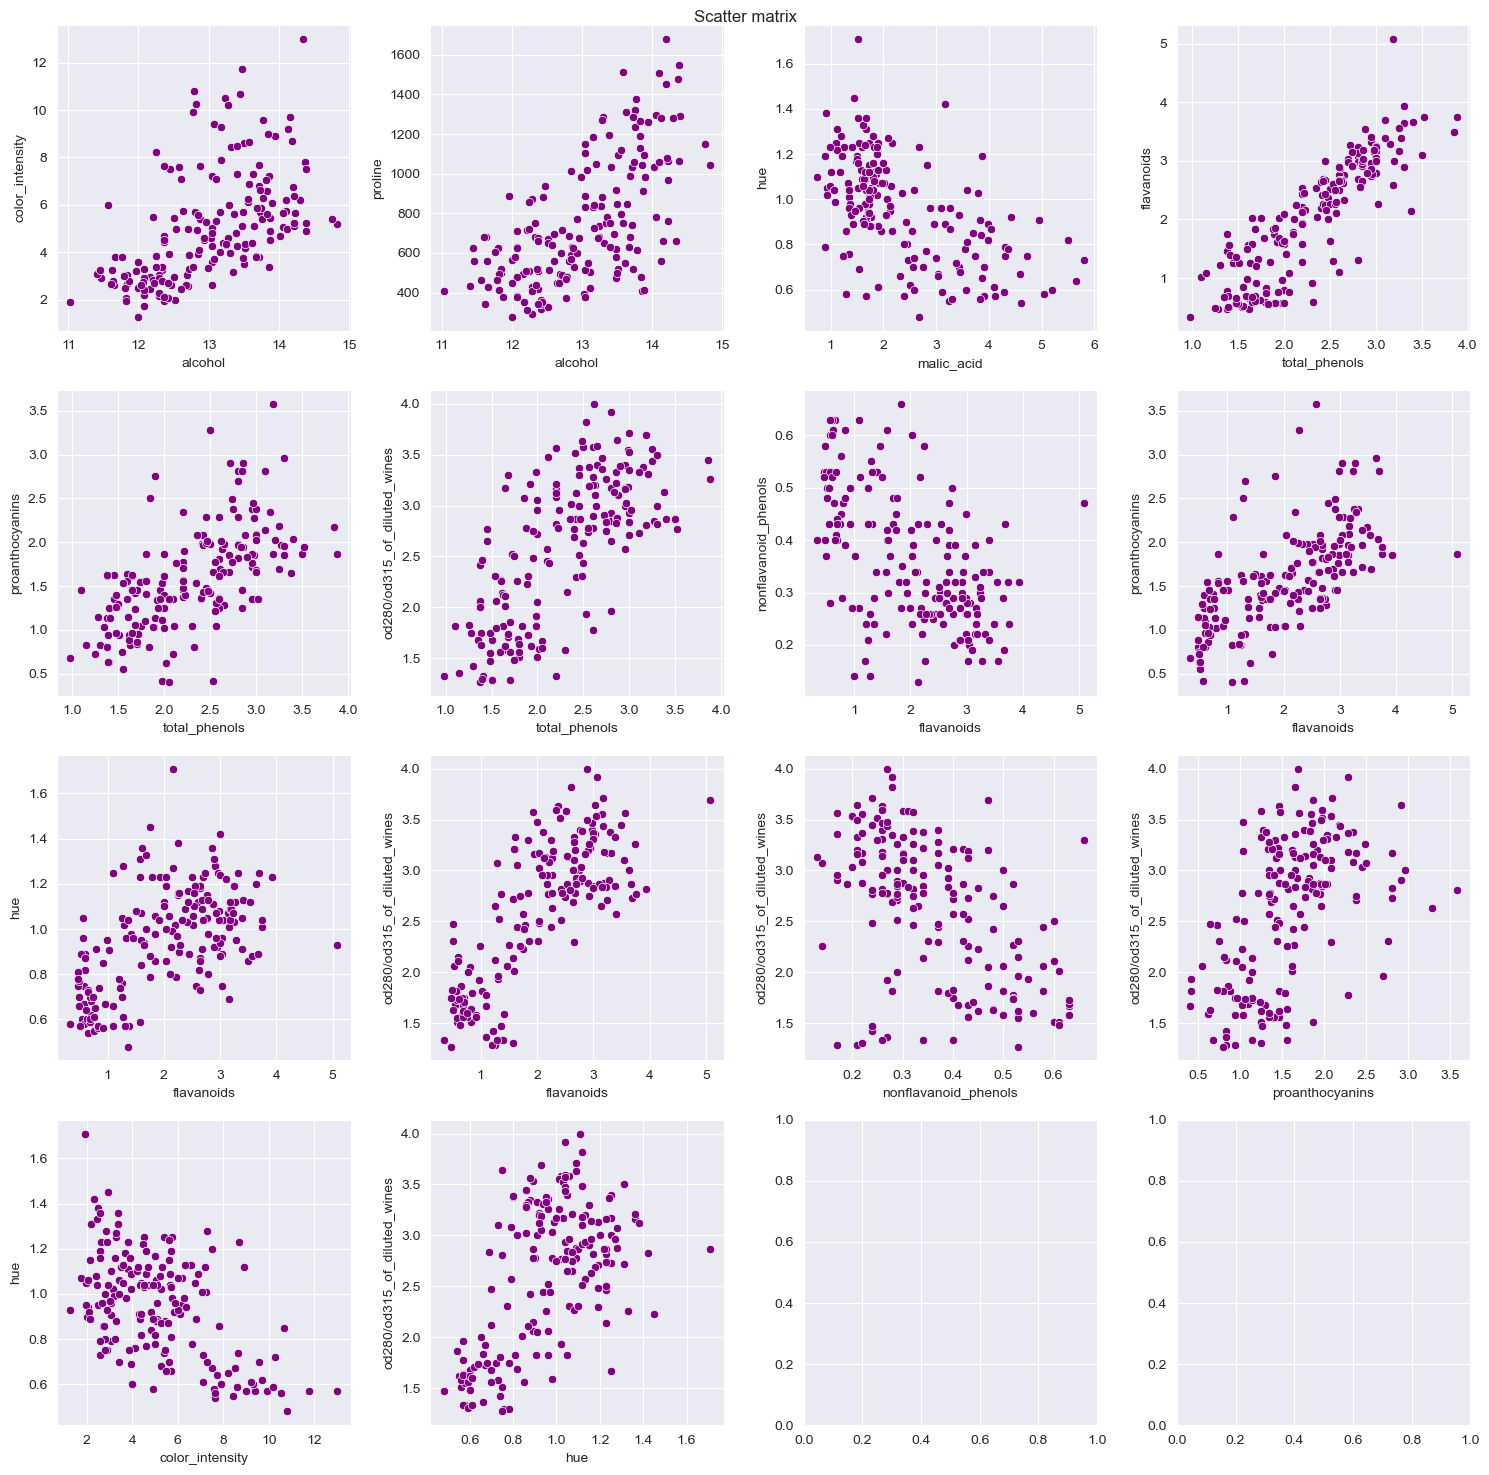

In [19]:
subframe_pairs = pd.DataFrame(pairs, columns = ['Attribute1', 'Attribute2'])

print(subframe_pairs)

fig, axes = plt.subplots(4, 4, figsize = (15, 15))
fig.suptitle('Scatter matrix')

    
for i in range(len(subframe_pairs)):
    sns.scatterplot(x = wd[subframe_pairs.loc[i][0]], y = wd[subframe_pairs.loc[i][1]], ax=axes[i//4, i%4], color = 'purple')  
    
plt.tight_layout()
plt.show()

Полученные коэффициенты корреляции совпадают с матрицей рассеивания.

Качество вина не зависит от одного параметра напрямую, каждый признак влияет на качество. 